## Import of necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from preprocess import load_data, inform
import warnings
warnings.filterwarnings('ignore')

## Load the data with specified strategy for missing data

In [2]:
full, train, test = load_data()

Found 27 input files in directory 'raw_data'.
Full data has 49312 entries before preprocessing.

===== Full data =====
1 of 5 columns contain possible outliers.
1.37% of the data are considered a potential outlier and are replaced by the mean.
Actiwatch activity counts    6.846204
dtype: float64

Missing values for columns:
Percentage of missing values in merged sleep data: 0.26%

Missing data per columns in percent:
                 column_name  percent_missing
0    Actiware classification         0.796966
1  Actiwatch activity counts         0.429916
2           Apple Watch ENMO         0.068949
3                        day         0.000000
4                       time         0.000000

Full data has 49312 entries after preprocessing.
===== Training data =====
1 of 5 columns contain possible outliers.
1.29% of the data are considered a potential outlier and are replaced by the mean.
Actiwatch activity counts    6.426332
dtype: float64

Missing values for columns:
Percentage of missin

## Print statistics of the datasets

In [3]:
print("Full data:")
inform(full)
print("Training data:")
inform(train)
print("Test data:")
inform(test)

Full data:
Shape of data: (49312, 5)
There are 91.30% 0 values in column 'Actiware classification'.
There are 91.74 0 values in column 'Actiwatch activity counts'.
Training data:
Shape of data: (39556, 5)
There are 91.82% 0 values in column 'Actiware classification'.
There are 92.17 0 values in column 'Actiwatch activity counts'.
Test data:
Shape of data: (8744, 5)
There are 90.86% 0 values in column 'Actiware classification'.
There are 91.21 0 values in column 'Actiwatch activity counts'.


## Gain overview of data

In [ ]:
sns.displot(full, x="Actiwatch activity counts")

In [ ]:
## Function to calculate total counts according to Philips’ Actiware software specification

In [ ]:
def total_counts(df, src_col, dest_col):
    day = df['day'].values
    cts = df[src_col].values    
    total = []
    for i in range(len(cts)):
        div_by_25_sum = 0
        div_by_5_sum = 0
        for j in range(-8, -4):
            if i + j >= 0 and day[i + j] == day[i]:
                div_by_25_sum += cts[i + j]
        for j in range(-4, 0):
            if i + j >= 0 and day[i + j] == day[i]:
                div_by_5_sum += cts[i + j]
        for j in range(1, 5):
            if i + j < len(cts) and day[i + j] == day[i]:
                div_by_5_sum += cts[i + j]
        for j in range(5, 9):
            if i + j < len(cts) and day[i + j] == day[i]:
                div_by_25_sum += cts[i + j]
        calculation = 0.04 * div_by_25_sum + 0.20 * div_by_5_sum + 4.00 * cts[i]
        total.append(calculation)
    df[dest_col] = total

In [ ]:
# call total_counts function and add a column depicting total counts from Actiwatch
total_counts(train, 'Actiwatch activity counts', 'Actiwatch Total Counts')

# print overview of training dataset
train

## Helper function that classifies into sleep/wake according to threshold 40

In [ ]:
def classify(row, col):
    if row[col] > 40:
        return 1
    else:
        return 0

## Perform classification of actiwatch total counts


In [ ]:
train['Actiware classification calculated'] = train.apply(lambda x: classify(x, 'Actiwatch Total Counts'), axis=1)

# print first 30 items
train.head(30)

## Print statistics of classification

In [ ]:
classification_stats = train.groupby(["Actiware classification", "Actiware classification calculated"]).size()
print(classification_stats)

## Draw scatter plot from Apple Watch and Actiwatch

In [ ]:
train.plot.scatter(x='Apple Watch ENMO', y='Actiwatch activity counts')

## Fit linear Regression Model

In [ ]:
# declare x and y for the model
x = train['Apple Watch ENMO']
y = train['Actiwatch activity counts']

# fit linear model
model = numpy.poly1d(numpy.polyfit(x, y, 1))

# create linspace to draw scatter plot in next step
line = numpy.linspace(0, 3.5, 1000)

# scatter plot
plt.scatter(x, y)

# draw regression graph into plot
plt.plot(line, model(line))

print('The function of the regression line is:\nf(x) =', str(model).strip())

## Predict if sleep or awake for test data

In [ ]:
# predict activity counts
test['Predicted activity counts'] = model(test['Apple Watch ENMO'])

# calculate total counts from prediction
total_counts(test, 'Predicted activity counts', 'Predicted Total Counts')

# print first 15 rows
test.head(15)

In [ ]:
# classify
test['Predicted wake'] = test.apply(lambda x: classify(x, 'Predicted Total Counts'), axis=1)

test

## Print statistics of classification

In [ ]:
classification_stats = test.groupby(["Actiware classification", "Predicted wake"]).size()
print(classification_stats)

In [3]:
print("Full data:")
inform(full)
print("Training data:")
inform(train)
print("Test data:")
inform(test)
print("Validation data:")
inform(val)

Full data:
Shape of data: (49312, 5)
There are 92.10% 0 values in column 'Actiware classification'.
There are 92.17 0 values in column 'Actiwatch activity counts'.
Training data:
Shape of data: (39556, 5)
There are 92.67% 0 values in column 'Actiware classification'.
There are 92.64 0 values in column 'Actiwatch activity counts'.
Test data:
Shape of data: (6584, 5)
There are 90.69% 0 values in column 'Actiware classification'.
There are 90.87 0 values in column 'Actiwatch activity counts'.
Validation data:
Shape of data: (2160, 5)
There are 93.94% 0 values in column 'Actiware classification'.
There are 93.47 0 values in column 'Actiwatch activity counts'.


## Gain overview of data

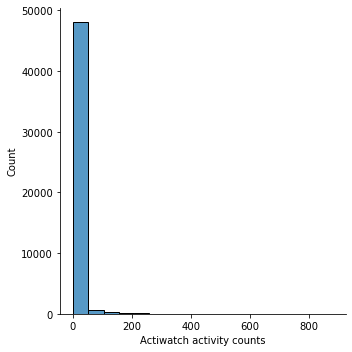

In [4]:
sns.displot(full, x="Actiwatch activity counts")

## Function to calculate total counts according to Philips’ Actiware software specification

In [5]:
def total_counts(df, src_col, dest_col):
    day = df['day'].values
    cts = df[src_col].values    
    total = []
    for i in range(len(cts)):
        div_by_25_sum = 0
        div_by_5_sum = 0
        for j in range(-8, -4):
            if i + j >= 0 and day[i + j] == day[i]:
                div_by_25_sum += cts[i + j]
        for j in range(-4, 0):
            if i + j >= 0 and day[i + j] == day[i]:
                div_by_5_sum += cts[i + j]
        for j in range(1, 5):
            if i + j < len(cts) and day[i + j] == day[i]:
                div_by_5_sum += cts[i + j]
        for j in range(5, 9):
            if i + j < len(cts) and day[i + j] == day[i]:
                div_by_25_sum += cts[i + j]
        calculation = 0.04 * div_by_25_sum + 0.20 * div_by_5_sum + 4.00 * cts[i]
        total.append(calculation)
    df[dest_col] = total

In [6]:
# call total_counts function and add a column depicting total counts from Actiwatch
total_counts(train, 'Actiwatch activity counts', 'Actiwatch Total Counts')

# print overview of training dataset
train

,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,day,time,Actiwatch Total Counts
0,0.0,0.0,0.209673,22,20:58:00,114.64
1,109.0,0.0,0.227648,22,20:58:15,555.20
2,170.0,0.0,0.217089,22,20:58:30,812.40
3,91.0,0.0,0.267528,22,20:58:45,548.68
4,101.0,0.0,0.222397,22,20:59:00,607.12
...,...,...,...,...,...,...
49307,270.0,1.0,0.281130,1,07:25:45,1417.16
49308,105.0,1.0,0.086050,1,07:26:00,752.84
49309,149.0,1.0,0.180595,1,07:26:15,858.08
49310,182.0,0.0,0.146303,1,07:26:30,942.04


## Helper function that classifies into sleep/wake according to threshold 40

In [7]:
def classify(row, col):
    if row[col] > 40:
        return 1
    else:
        return 0

## Perform classification of actiwatch total counts


In [8]:
train['Actiware classification calculated'] = train.apply(lambda x: classify(x, 'Actiwatch Total Counts'), axis=1)

# print first 30 items
train.head(30)

,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,day,time,Actiwatch Total Counts,Actiware classification calculated
0,0.0,0.0,0.209673,22,20:58:00,114.64,1
1,109.0,0.0,0.227648,22,20:58:15,555.20,1
2,170.0,0.0,0.217089,22,20:58:30,812.40,1
3,91.0,0.0,0.267528,22,20:58:45,548.68,1
4,101.0,0.0,0.222397,22,20:59:00,607.12,1
5,125.0,1.0,0.262205,22,20:59:15,727.64,1
6,105.0,1.0,0.283417,22,20:59:30,673.96,1
7,176.0,1.0,0.314253,22,20:59:45,954.84,1
8,105.0,1.0,0.328872,22,21:00:00,689.72,1
9,159.0,1.0,0.444264,22,21:00:15,897.32,1


## Print statistics of classification

In [9]:
classification_stats = train.groupby(["Actiware classification", "Actiware classification calculated"]).size()
print(classification_stats)

Actiware classification  Actiware classification calculated
0.0                      0                                     36443
                         1                                       215
1.0                      1                                      2898
dtype: int64


## Draw scatter plot from Apple Watch and Actiwatch

<AxesSubplot:xlabel='Apple Watch ENMO', ylabel='Actiwatch activity counts'>

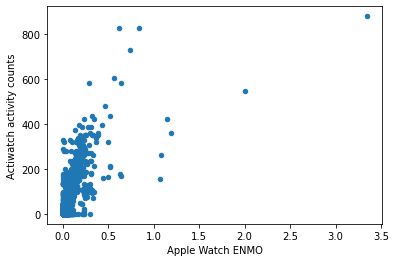

In [10]:
train.plot.scatter(x='Apple Watch ENMO', y='Actiwatch activity counts')

## Fit linear Regression Model

The function of the regression line is:
f(x) = 594 x + 0.07617


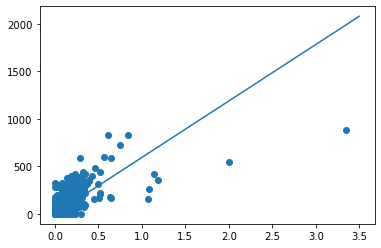

In [11]:
# declare x and y for the model
x = train['Apple Watch ENMO']
y = train['Actiwatch activity counts']

# fit linear model
model = numpy.poly1d(numpy.polyfit(x, y, 1))

# create linspace to draw scatter plot in next step
line = numpy.linspace(0, 3.5, 1000)

# scatter plot
plt.scatter(x, y)

# draw regression graph into plot
plt.plot(line, model(line))

print('The function of the regression line is:\nf(x) =', str(model).strip())

## Predict if sleep or awake for test data

In [12]:
# predict activity counts
test['Predicted activity counts'] = model(test['Apple Watch ENMO'])

# calculate total counts from prediction
total_counts(test, 'Predicted activity counts', 'Predicted Total Counts')

# print first 15 rows
test.head(15)

,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,day,time,Predicted activity counts,Predicted Total Counts
2452,0.0,0.0,0.091199,15,00:06:00,54.252731,386.609588
2453,0.0,0.0,0.046923,15,00:06:15,27.950603,297.585266
2454,0.0,0.0,1.130759,15,00:06:30,671.798239,2763.378105
2455,134.0,0.0,0.081660,15,00:06:45,48.585614,402.192923
2456,159.0,0.0,0.089497,15,00:07:00,53.241463,420.453007
2457,261.0,0.0,0.113026,15,00:07:15,67.218586,465.616506
2458,215.0,0.0,0.200720,15,00:07:30,119.312652,659.491211
2459,0.0,1.0,0.073109,15,00:07:45,43.506444,264.236630
2460,5.0,1.0,0.003322,15,00:08:00,2.049295,99.938463
2461,0.0,1.0,0.006975,15,00:08:15,4.219840,97.777026


In [13]:
# classify
test['Predicted wake'] = test.apply(lambda x: classify(x, 'Predicted Total Counts'), axis=1)

test

,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,day,time,Predicted activity counts,Predicted Total Counts,Predicted wake
2452,0.0,0.0,0.091199,15,00:06:00,54.252731,386.609588,1
2453,0.0,0.0,0.046923,15,00:06:15,27.950603,297.585266,1
2454,0.0,0.0,1.130759,15,00:06:30,671.798239,2763.378105,1
2455,134.0,0.0,0.081660,15,00:06:45,48.585614,402.192923,1
2456,159.0,0.0,0.089497,15,00:07:00,53.241463,420.453007,1
...,...,...,...,...,...,...,...,...
38351,0.0,0.0,0.134241,25,07:06:45,79.821508,405.943963,1
38352,0.0,0.0,0.143355,25,07:07:00,85.235407,424.605670,1
38353,0.0,0.0,0.176234,25,07:07:15,104.767029,489.882846,1
38354,0.0,0.0,0.100067,25,07:07:30,59.520459,313.399211,1


## Print statistics of classification

In [14]:
classification_stats = test.groupby(["Actiware classification", "Predicted wake"]).size()
print(classification_stats)

Actiware classification  Predicted wake
0.0                      0                 5840
                         1                  131
1.0                      0                  275
                         1                  338
dtype: int64
